In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
dataset_path = 'C:/Users/naren/Downloads/ABP/Assignment_02/spotify-dataset.csv'
spotify_data = pd.read_csv(dataset_path)

In [8]:
# Drop rows with missing values
spotify_data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

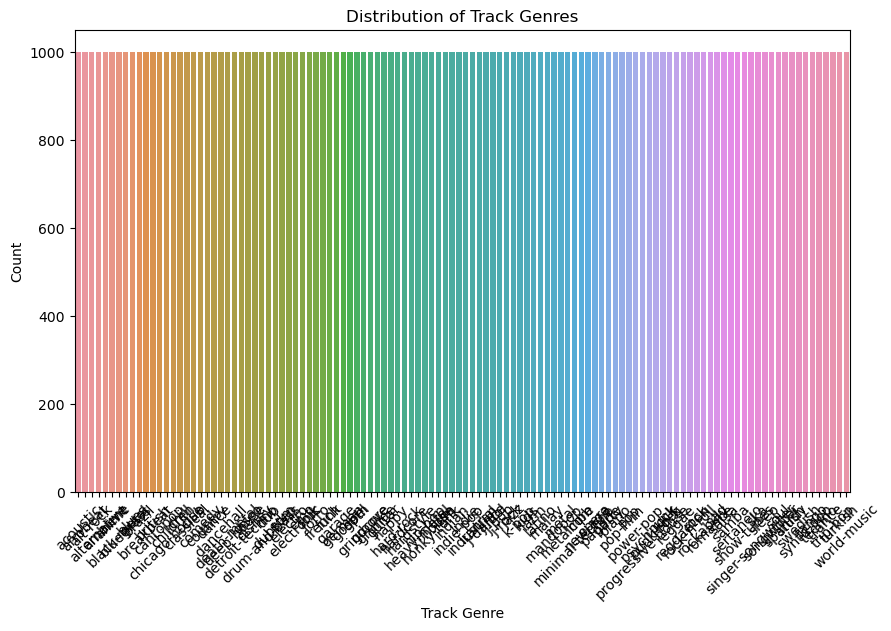

C:\Users\naren\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


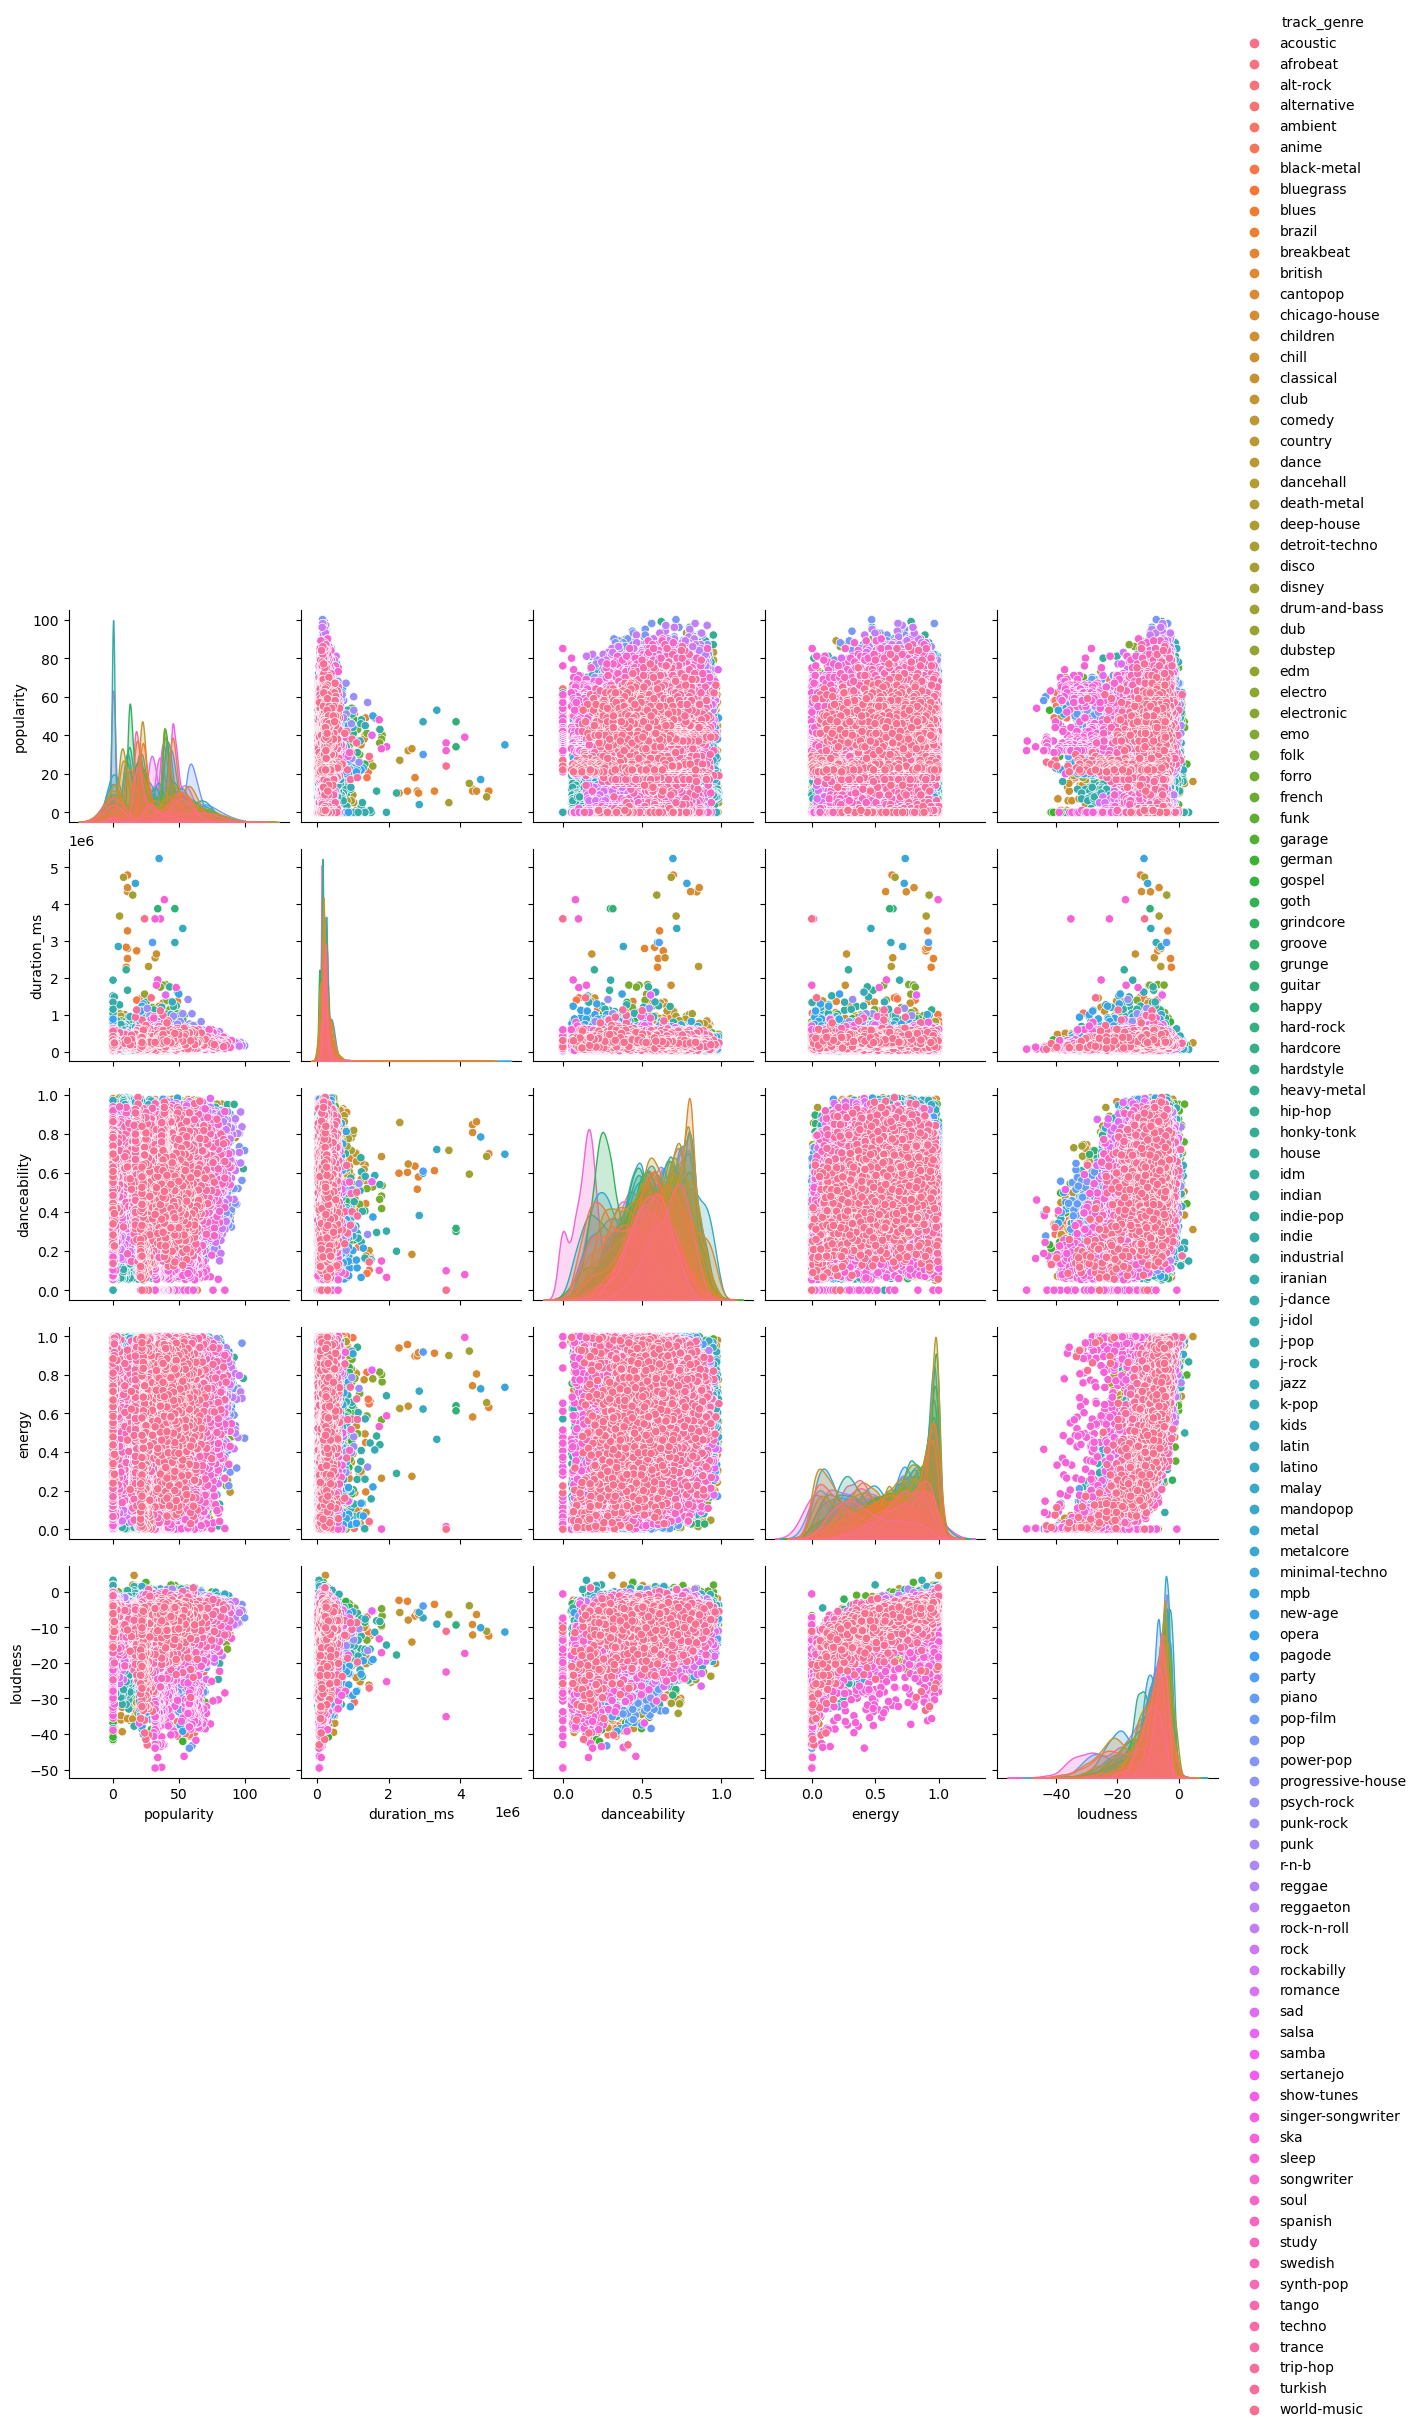

In [9]:
# Exploratory Data Analysis (EDA)
print(spotify_data.info())
print(spotify_data.describe())

plt.figure(figsize=(10, 6))
sns.countplot(x='track_genre', data=spotify_data)
plt.title('Distribution of Track Genres')
plt.xlabel('Track Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

sns.pairplot(spotify_data, vars=['popularity', 'duration_ms', 'danceability', 'energy', 'loudness'], hue='track_genre')
plt.show()

In [10]:
# Encode the target variable 'track_genre' into numerical labels
spotify_data['encoded_genre'] = pd.factorize(spotify_data['track_genre'])[0]

# Define features and target variable
X = spotify_data.drop(['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'encoded_genre'], axis=1)
y = spotify_data['encoded_genre']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [12]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)


Logistic Regression Performance:
Accuracy: 0.49043859649122806

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.68       213
           1       0.72      0.72      0.72       203
           2       0.32      0.33      0.33       215
           3       0.35      0.45      0.39       184
           4       0.70      0.70      0.70       197
           5       0.42      0.35      0.38       193
           6       0.73      0.84      0.78       210
           7       0.57      0.68      0.62       205
           8       0.42      0.25      0.31       214
           9       0.53      0.46      0.49       197
          10       0.64      0.61      0.62       199
          11       0.29      0.19      0.23       214
          12       0.45      0.69      0.55       193
          13       0.76      0.77      0.76       206
          14       0.54      0.57      0.56       214
          15       0.55      0.55      0.55    

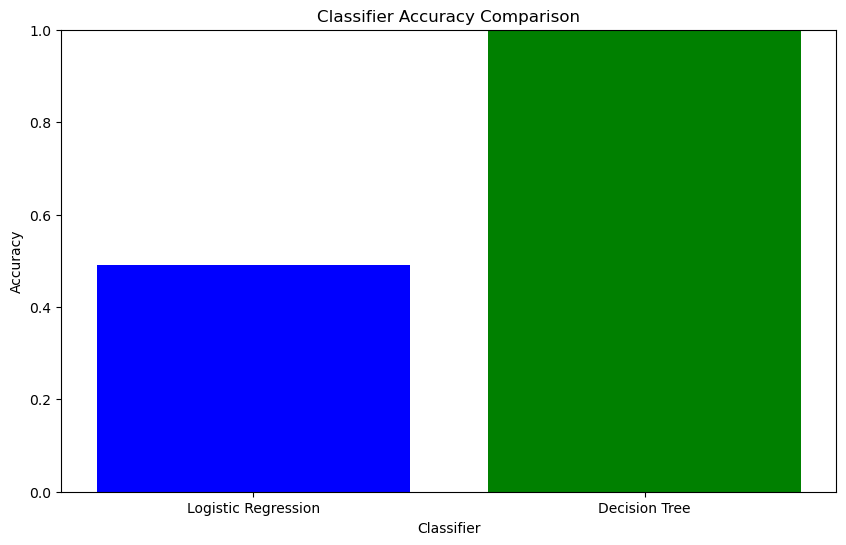

In [13]:
# Evaluation
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

print("\nDecision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Visualize the performance
classifiers = ['Logistic Regression', 'Decision Tree']
accuracy_scores = [accuracy_score(y_test, y_pred_log_reg),
                   accuracy_score(y_test, y_pred_dt)]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green'])
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure accurate comparison
plt.show()